In [261]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly as py 
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)
from ipywidgets import widgets

from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [262]:
city_day = pd.read_csv ('city_day.csv')
df = city_day.copy()
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [263]:
len(city_day)

29531

In [264]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [265]:
city_day['Date'] = pd.to_datetime(city_day['Date'])
city_day.set_index('Date',inplace=True)

In [266]:
city_day.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [267]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * mis_val / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns

In [268]:
city_day_missing= missing_values_table(city_day)
city_day_missing

,Missing Values,% of Total Values
Xylene,18109,61.3
PM10,11140,37.7
NH3,10328,35.0
Toluene,8041,27.2
Benzene,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6


#### Missing Values in the Data

- In the case of Xylene, the number of Missing values make up more than 50% of total data available, meaning any sort of itrapolation method wouldyield very approximate measures, that would add no value to the analysis <br>
- So we drop the Xylene parameter

For the rest of the values, we fill the missing values by intpolating across the values.

In [269]:
city_day = city_day.drop('Xylene', axis=1)

In [270]:
city_day.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN,NaN


In [271]:
city_day.interpolate(method='time', limit_direction="both", inplace=True)

In [272]:
city_day.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,313.22,607.98,0.92,18.22,17.15,4.59,0.92,27.64,133.36,0.00,0.02,472.0,NaN
2015-01-02,Ahmedabad,186.18,269.55,0.97,15.69,16.46,7.83,0.97,24.55,34.06,3.68,5.50,454.0,NaN
2015-01-03,Ahmedabad,87.18,131.90,17.40,19.30,29.70,4.63,17.40,29.07,30.70,6.80,16.40,143.0,NaN
2015-01-04,Ahmedabad,151.84,241.84,1.70,18.48,17.97,130.36,1.70,18.59,36.08,4.43,10.14,319.0,NaN
2015-01-05,Ahmedabad,146.60,219.13,22.10,21.42,37.76,5.50,22.10,39.33,39.31,7.01,18.89,325.0,NaN


In [273]:
missing_values_table(city_day)

,Missing Values,% of Total Values
AQI_Bucket,4681,15.9


The last column - 'AQI Bucket' is a qualititative measure, and hence cannot be interpolated.<br>
Thus we can drop that column for now

In [274]:
city_day = city_day.drop('AQI_Bucket', axis=1)

In [275]:
city_day.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
Date,,,,,,,,,,,,,
2015-01-01,Ahmedabad,313.22,607.98,0.92,18.22,17.15,4.59,0.92,27.64,133.36,0.00,0.02,472.0
2015-01-02,Ahmedabad,186.18,269.55,0.97,15.69,16.46,7.83,0.97,24.55,34.06,3.68,5.50,454.0
2015-01-03,Ahmedabad,87.18,131.90,17.40,19.30,29.70,4.63,17.40,29.07,30.70,6.80,16.40,143.0
2015-01-04,Ahmedabad,151.84,241.84,1.70,18.48,17.97,130.36,1.70,18.59,36.08,4.43,10.14,319.0
2015-01-05,Ahmedabad,146.60,219.13,22.10,21.42,37.76,5.50,22.10,39.33,39.31,7.01,18.89,325.0


In [276]:
print(len(df['City'].unique()))
df['City'].unique()

26


array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

### First Visuals

In [277]:
Ahm = city_day[city_day['City']=='Ahmedabad']
Ahm.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
Date,,,,,,,,,,,,,
2015-01-01,Ahmedabad,313.22,607.98,0.92,18.22,17.15,4.59,0.92,27.64,133.36,0.00,0.02,472.0
2015-01-02,Ahmedabad,186.18,269.55,0.97,15.69,16.46,7.83,0.97,24.55,34.06,3.68,5.50,454.0
2015-01-03,Ahmedabad,87.18,131.90,17.40,19.30,29.70,4.63,17.40,29.07,30.70,6.80,16.40,143.0
2015-01-04,Ahmedabad,151.84,241.84,1.70,18.48,17.97,130.36,1.70,18.59,36.08,4.43,10.14,319.0
2015-01-05,Ahmedabad,146.60,219.13,22.10,21.42,37.76,5.50,22.10,39.33,39.31,7.01,18.89,325.0


In [278]:
Ahm_norm = pd.DataFrame(normalize(Ahm.iloc[:,1:], axis=0), columns = Ahm.columns[1:])

In [279]:
Ahm_norm.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,0.068269,0.080025,0.000661,0.006108,0.007119,0.002553,0.000793,0.010871,0.066373,0.000000,0.000013,0.022485
1,0.040580,0.035480,0.000697,0.005260,0.006832,0.004355,0.000836,0.009656,0.016952,0.007859,0.003471,0.021628
2,0.019002,0.017361,0.012504,0.006470,0.012328,0.002575,0.014989,0.011434,0.015279,0.014523,0.010350,0.006812
3,0.033095,0.031832,0.001222,0.006195,0.007459,0.072506,0.001464,0.007312,0.017957,0.009461,0.006399,0.015197
4,0.031953,0.028843,0.015882,0.007180,0.015673,0.003059,0.019038,0.015469,0.019565,0.014971,0.011921,0.015482


In [280]:
layout = go.Layout(title = 'Line graphs showing each of the pollutant levels from Jan 2015 to June 2020')

data=[]

for i in Ahm_norm.columns[:-1]:
    x = Ahm.index
    y = Ahm_norm[i]
    trace = go.Scatter(
        x = x,
        y = y,
        name = i,
        mode = 'lines'
    )
    data.append(trace)

fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)

In [281]:
city_day.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
Date,,,,,,,,,,,,,
2015-01-01,Ahmedabad,313.22,607.98,0.92,18.22,17.15,4.59,0.92,27.64,133.36,0.00,0.02,472.0
2015-01-02,Ahmedabad,186.18,269.55,0.97,15.69,16.46,7.83,0.97,24.55,34.06,3.68,5.50,454.0
2015-01-03,Ahmedabad,87.18,131.90,17.40,19.30,29.70,4.63,17.40,29.07,30.70,6.80,16.40,143.0
2015-01-04,Ahmedabad,151.84,241.84,1.70,18.48,17.97,130.36,1.70,18.59,36.08,4.43,10.14,319.0
2015-01-05,Ahmedabad,146.60,219.13,22.10,21.42,37.76,5.50,22.10,39.33,39.31,7.01,18.89,325.0


In [282]:
city_norm = pd.DataFrame(normalize(city_day.iloc[:,1:], axis=0), columns = city_day.columns[1:])

In [283]:
city_norm['City'] = city_day['City'].values
city_norm['Date'] = pd.to_datetime(city_day.index.values)
city_norm.set_index('Date',inplace=True)
city_norm = city_norm.drop('AQI', axis=1)
city_norm.head()
# len(city_day) ==  len(city_norm)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,City
Date,,,,,,,,,,,,
2015-01-01,0.018622,0.022395,0.000187,0.002821,0.002250,0.000727,0.000742,0.006938,0.018988,0.000000,0.000005,Ahmedabad
2015-01-02,0.011069,0.009929,0.000197,0.002430,0.002160,0.001240,0.000782,0.006162,0.004849,0.001341,0.001475,Ahmedabad
2015-01-03,0.005183,0.004859,0.003540,0.002989,0.003897,0.000734,0.014030,0.007297,0.004371,0.002478,0.004399,Ahmedabad
2015-01-04,0.009027,0.008908,0.000346,0.002862,0.002358,0.020653,0.001371,0.004666,0.005137,0.001615,0.002720,Ahmedabad
2015-01-05,0.008716,0.008072,0.004496,0.003317,0.004955,0.000871,0.017820,0.009872,0.005597,0.002555,0.005067,Ahmedabad


In [284]:
year = widgets.IntSlider(
    value=1.0,
    min='2015',
    max='2020',
    step=1.0,
    description='Year: ',
    continuous_update=False
)

container = widgets.HBox(children=[year])

origin = widgets.Dropdown(
    options=city_norm['City'].unique(),
    value='Ahmedabad',
    description='City',
)


# Assign an empty figure widget with two traces
# trace1 = go.Scatter(x=city_norm.index, y=city_norm[city_norm['City']=='Ahmedabad'], name='Pollution Levels', mode='lines')
data=[]
temp = city_norm[city_norm.index.year==2015]
for i in city_norm.columns[:-1]:
    x = city_norm.index
    y = temp[temp['City']=='Ahmedabad'].loc[:, i]
    trace = go.Scatter(
        x = x,
        y = y,
        name = i,
        mode = 'lines'
    )
    data.append(trace)


g = go.FigureWidget(data=data,
                    layout=go.Layout(
                        title=dict(
                            text='Pollution Levels across Major Cities in India'
                        )
                        
                    ))

In [285]:
def validate():
    if origin.value in city_norm['City'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if year.value == 2020:
            temp = city_norm[city_norm.index.year>=year.value-1]
        else:
            temp = city_norm[city_norm.index.year==year.value]
        x1 = temp[temp['City'] == origin.value]
        with g.batch_update():
            for i,j in zip(range(11), city_norm.columns[:-1]):
                g.data[i].y = x1.loc[:,j]
                g.data[i].x = x1.index
            g.layout.xaxis.title = 'Date'
            g.layout.yaxis.title = 'Pollutant Levels (Normalized)'



origin.observe(response, names="value")
year.observe(response, names="value")

In [286]:
container2 = widgets.HBox([origin])
widgets.VBox([container, container2,
              g])

In [287]:
print (df.corr())

            PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.846498  0.433491  0.350709  0.436792  0.275086  0.089912   
PM10     0.846498  1.000000  0.502349  0.464380  0.527768  0.376816  0.112588   
NO       0.433491  0.502349  1.000000  0.478070  0.794890  0.185621  0.212607   
NO2      0.350709  0.464380  0.478070  1.000000  0.627627  0.234938  0.356521   
NOx      0.436792  0.527768  0.794890  0.627627  1.000000  0.166224  0.226992   
NH3      0.275086  0.376816  0.185621  0.234938  0.166224  1.000000  0.104891   
CO       0.089912  0.112588  0.212607  0.356521  0.226992  0.104891  1.000000   
SO2      0.132325  0.256974  0.170322  0.392233  0.238397 -0.038998  0.489697   
O3       0.161238  0.244919  0.014580  0.293349  0.093170  0.094972  0.041736   
Benzene  0.023911  0.022265  0.035771  0.025260  0.039121 -0.015650  0.061861   
Toluene  0.117080  0.169335  0.150857  0.273926  0.189386  0.013227  0.277904   
Xylene   0.114579  0.081700 

In [288]:
features=Ahm_norm
target=Ahm_norm['AQI']
#target=Ahm_norm[['AQI','PM2.5','O3']]
features=features.drop('PM2.5',axis=1)
features=features.drop('PM10',axis=1)
features=features.drop('NO',axis=1)
features=features.drop('NO2',axis=1)
features=features.drop('NOx',axis=1)
features=features.drop('NH3',axis=1)
features=features.drop('CO',axis=1)
#features=features.drop('AQI',axis=1)
features=features.drop('SO2',axis=1)
features=features.drop('O3',axis=1)
features=features.drop('Benzene',axis=1)
features=features.drop('Toluene',axis=1)
features.tail()
#features.head()

,AQI
2004,0.004383
2005,0.003906
2006,0.003525
2007,0.004669
2008,0.005669


In [289]:
Ahm.reset_index(drop = True, inplace = True)

In [290]:
Ahm_features = Ahm
Ahm_features = Ahm_features.drop('City', axis = 1)
Ahm_features = Ahm_features.drop('AQI', axis = 1)

In [291]:
Ahm_features.to_numpy()

array([[3.1322e+02, 6.0798e+02, 9.2000e-01, ..., 1.3336e+02, 0.0000e+00,
        2.0000e-02],
       [1.8618e+02, 2.6955e+02, 9.7000e-01, ..., 3.4060e+01, 3.6800e+00,
        5.5000e+00],
       [8.7180e+01, 1.3190e+02, 1.7400e+01, ..., 3.0700e+01, 6.8000e+00,
        1.6400e+01],
       ...,
       [2.9750e+01, 1.2798e+02, 9.0600e+00, ..., 3.4990e+01, 1.3900e+00,
        6.0210e+01],
       [4.0020e+01, 1.2110e+02, 7.0900e+00, ..., 4.1640e+01, 1.2100e+00,
        4.4100e+01],
       [3.7630e+01, 6.6000e+01, 4.4200e+00, ..., 9.6900e+00, 1.7300e+00,
        4.7050e+01]])

In [292]:
import matplotlib.pyplot as plt

target = target.to_numpy()

In [293]:
X_train, X_test, y_train, y_test = train_test_split(Ahm_features, target)

In [294]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [295]:
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape

Predicted values: [0.00848732 0.00663651 0.01143422 0.08162048 0.02372497 0.0108161
 0.02790253 0.01635664 0.02074268 0.00795804 0.05737751 0.08157443
 0.01001467 0.03090916 0.00995824 0.05233261 0.04073167 0.00829332
 0.02329181 0.01261386 0.02949182 0.0287508  0.00815407 0.00975051
 0.00675716 0.01710338 0.0243598  0.02507794 0.00686946 0.00886136
 0.02120449 0.01543218 0.00961345 0.01180586 0.01251888 0.00516227
 0.01004818 0.00659532 0.01790288 0.00911406 0.02646994 0.00879188
 0.03166437 0.00879112 0.01479304 0.02449321 0.01222866 0.01612818
 0.03327775 0.00722523 0.0204755  0.02353558 0.01919023 0.02074264
 0.01433887 0.01832752 0.01774494 0.03666652 0.01510019 0.00860998
 0.00622527 0.01072956 0.04624548 0.00853442 0.0224362  0.0113798
 0.00828581 0.00679773 0.01321927 0.00915537 0.02127743 0.01089199
 0.0093516  0.0343791  0.02345494 0.01051269 0.01027486 0.0120156
 0.01532641 0.01195662 0.03552734 0.01253297 0.01707067 0.01103516
 0.02152549 0.0153833  0.02214825 0.01501813 0.

(503,)

In [296]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

R^2 score for liner regression:  0.6687029670456359


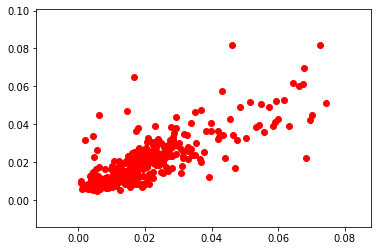

In [297]:
plt.scatter(y_test,y_pred,color='red')
plt.show()

In [298]:
from sklearn.tree import DecisionTreeRegressor

In [299]:
dtr = DecisionTreeRegressor()
m=dtr.fit(X_train, y_train)

In [300]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9998843364656341


In [301]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.4588722167985327


In [302]:
Coim= city_day[city_day['City']=='Coimbatore']
Coim.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
Date,,,,,,,,,,,,,
2019-06-12,Coimbatore,38.46,43.49,6.68,4.31,10.98,9.32,1.16,10.25,29.80,0.04,0.43,144.0
2019-06-13,Coimbatore,21.57,27.05,6.57,4.95,11.52,8.80,1.14,9.75,25.46,0.04,0.23,65.0
2019-06-14,Coimbatore,25.27,32.08,6.86,5.35,12.21,8.21,1.18,10.92,23.45,0.04,0.31,66.0
2019-06-15,Coimbatore,30.04,35.85,7.37,6.23,13.60,7.35,1.15,10.51,17.24,0.04,0.27,60.0
2019-06-16,Coimbatore,24.54,31.41,6.23,4.10,10.33,6.65,1.11,9.00,22.96,0.02,0.09,62.0


In [303]:
X_train, X_test, y_train, y_test = train_test_split(features1, target1)
y_test.tail()

NameError: name 'features1' is not defined

In [304]:
Coim_norm = pd.DataFrame(normalize(Coim.iloc[:,1:], axis=0), columns = Coim.columns[1:])

In [305]:
Coim_norm.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,0.062670,0.053595,0.017721,0.006299,0.015733,0.024177,0.055538,0.056118,0.047754,0.025451,0.061531,0.090728
1,0.035148,0.033335,0.017429,0.007234,0.016507,0.022828,0.054581,0.053381,0.040799,0.025451,0.032912,0.040954
2,0.041177,0.039534,0.018198,0.007819,0.017495,0.021298,0.056496,0.059787,0.037578,0.025451,0.044360,0.041584
3,0.048950,0.044180,0.019551,0.009105,0.019487,0.019067,0.055060,0.057542,0.027627,0.025451,0.038636,0.037803
4,0.039987,0.038708,0.016527,0.005992,0.014801,0.017251,0.053144,0.049275,0.036793,0.012725,0.012879,0.039063


In [306]:
features1=Coim_norm
target1=Coim_norm['AQI']
#target=Ahm_norm[['AQI','PM2.5','O3']]
features1=features1.drop('PM2.5',axis=1)
features1=features1.drop('PM10',axis=1)
features1=features1.drop('NO',axis=1)
features1=features1.drop('NO2',axis=1)
features1=features1.drop('NOx',axis=1)
features1=features1.drop('NH3',axis=1)
features1=features1.drop('CO',axis=1)
#features1=features1.drop('AQI',axis=1)
features1=features1.drop('SO2',axis=1)
features1=features1.drop('O3',axis=1)
features1=features1.drop('Benzene',axis=1)
features1=features1.drop('Toluene',axis=1)
features1.tail()
#features.head()

,AQI
381,0.021422
382,0.020162
383,0.025832
384,0.020792
385,0.031503


In [307]:
Coim.reset_index(drop = True, inplace = True)

In [308]:
Coim_features = Coim
Coim_features = Coim_features.drop('City', axis = 1)
Coim_features = Coim_features.drop('AQI', axis = 1)

In [309]:
Coim_features.to_numpy()

array([[3.846e+01, 4.349e+01, 6.680e+00, ..., 2.980e+01, 4.000e-02,
        4.300e-01],
       [2.157e+01, 2.705e+01, 6.570e+00, ..., 2.546e+01, 4.000e-02,
        2.300e-01],
       [2.527e+01, 3.208e+01, 6.860e+00, ..., 2.345e+01, 4.000e-02,
        3.100e-01],
       ...,
       [1.626e+01, 2.081e+01, 1.204e+01, ..., 1.009e+01, 0.000e+00,
        0.000e+00],
       [1.421e+01, 1.569e+01, 2.510e+01, ..., 1.385e+01, 0.000e+00,
        0.000e+00],
       [1.500e+01, 6.600e+01, 4.000e-01, ..., 1.059e+01, 0.000e+00,
        0.000e+00]])

In [310]:
import matplotlib.pyplot as plt

target1 = target1.to_numpy()

In [311]:
X_train, X_test, y_train, y_test = train_test_split(Coim_features, target1)

In [312]:
regressor1 = LinearRegression(normalize=True)
regressor1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [313]:
print("Predicted values:", regressor1.predict(X_test))
y_pred = regressor1.predict(X_test)
y_pred.shape

Predicted values: [0.06740691 0.05040388 0.04899724 0.05837437 0.05090121 0.05774374
 0.05255134 0.04127673 0.05043872 0.05096418 0.05446132 0.0480432
 0.04051746 0.0439878  0.04811772 0.05365977 0.05326822 0.05587442
 0.05165746 0.04665383 0.06575726 0.05697325 0.03746823 0.05349687
 0.03890074 0.05526021 0.06123768 0.04459104 0.03950452 0.04007801
 0.02579788 0.03670814 0.06337484 0.0548629  0.05630931 0.04400713
 0.03673297 0.0432427  0.04811597 0.04986124 0.05102308 0.05341539
 0.11322326 0.04312341 0.04209284 0.04798224 0.03896347 0.04495302
 0.02822735 0.05334863 0.05500968 0.04301172 0.0437193  0.04998067
 0.04891048 0.03808489 0.05042058 0.05186395 0.05231339 0.07462121
 0.02541593 0.03412784 0.02735603 0.04975823 0.0459575  0.02742484
 0.05216176 0.06718896 0.0523705  0.06584263 0.04684216 0.04307771
 0.05291038 0.04002924 0.05235081 0.05000181 0.0600412  0.04485905
 0.02882845 0.05153376 0.05120823 0.04818039 0.06864704 0.06396794
 0.04762767 0.04897737 0.05376898 0.03961398 

(97,)

In [314]:
print("R^2 score for liner regression: ", regressor1.score(X_test, y_test))

R^2 score for liner regression:  0.0779748170068788


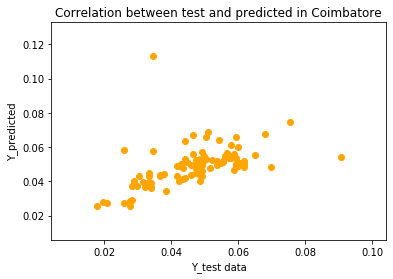

In [315]:
plt.scatter(y_test,y_pred,color='orange')
plt.title("Correlation between test and predicted in Coimbatore")
plt.xlabel("Y_test data")
plt.ylabel("Y_predicted")
plt.show()

In [316]:
Hyd= city_day[city_day['City']=='Hyderabad']
Hyd.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
Date,,,,,,,,,,,,,
2015-01-04,Hyderabad,151.84,241.84,3.70,17.19,20.89,130.36,0.30,2.58,30.34,0.41,6.15,319.0
2015-01-05,Hyderabad,146.60,219.13,3.61,9.69,13.30,5.50,0.23,5.19,31.28,0.39,7.22,325.0
2015-01-06,Hyderabad,149.58,252.10,4.21,22.02,26.23,5.46,0.31,9.09,28.56,0.52,5.14,318.0
2015-01-07,Hyderabad,217.87,376.51,26.08,40.08,66.15,134.82,0.53,9.03,31.08,1.92,16.35,353.0
2015-01-08,Hyderabad,229.90,360.95,10.31,33.02,43.33,3.71,0.44,8.47,35.72,1.89,14.27,383.0


In [317]:
Hyd_norm = pd.DataFrame(normalize(Hyd.iloc[:,1:], axis=0), columns = Hyd.columns[1:])
features2=Hyd_norm
target2=Hyd_norm['AQI']
#target=Ahm_norm[['AQI','PM2.5','O3']]
features2=features2.drop('PM2.5',axis=1)
features2=features2.drop('PM10',axis=1)
features2=features2.drop('NO',axis=1)
features2=features2.drop('NO2',axis=1)
features2=features2.drop('NOx',axis=1)
features2=features2.drop('NH3',axis=1)
features2=features2.drop('CO',axis=1)
#features2=features1.drop('AQI',axis=1)
features2=features2.drop('SO2',axis=1)
features2=features2.drop('O3',axis=1)
features2=features2.drop('Benzene',axis=1)
features2=features2.drop('Toluene',axis=1)
features2.tail()
#features.head()

,AQI
2001,0.008976
2002,0.007583
2003,0.007274
2004,0.007119
2005,0.007428


In [265]:
Hyd.reset_index(drop = True, inplace = True)
Hyd_features = Hyd
Hyd_features = Hyd_features.drop('City', axis = 1)
Hyd_features = Hyd_features.drop('AQI', axis = 1)
Hyd_features.to_numpy()
import matplotlib.pyplot as plt

target2 = target2.to_numpy()

In [266]:
X_train, X_test, y_train, y_test = train_test_split(Hyd_features, target2)
regressor2 = LinearRegression(normalize=True)
regressor2.fit(X_train, y_train)
print("Predicted values:", regressor2.predict(X_test))
y_pred = regressor2.predict(X_test)
y_pred.shape
print("R^2 score for liner regression: ", regressor2.score(X_test, y_test))

Predicted values: [0.02921243 0.01447606 0.01666352 0.01422206 0.02295886 0.01603303
 0.00980007 0.00966681 0.02475581 0.01530898 0.0185885  0.02337453
 0.01959916 0.02339705 0.00727232 0.02041364 0.01121212 0.01192557
 0.01245415 0.01446358 0.0162105  0.02395575 0.00973445 0.01813582
 0.00981797 0.01354447 0.04516596 0.01319158 0.01894348 0.01427025
 0.02380314 0.01366166 0.01199675 0.03348532 0.01587306 0.01872701
 0.01323842 0.02565903 0.02846648 0.0195784  0.01684854 0.01502124
 0.01417178 0.02521902 0.01535168 0.01569968 0.00790175 0.01200597
 0.00845364 0.01807842 0.01101229 0.0156305  0.01106122 0.025621
 0.02267285 0.00882166 0.01461373 0.02626216 0.01476797 0.00914359
 0.01833095 0.01189661 0.06177095 0.02356428 0.01853335 0.02026628
 0.01348439 0.01134499 0.01284459 0.01512409 0.02130999 0.01931198
 0.03162961 0.01867383 0.00909438 0.01533996 0.02132755 0.01561494
 0.02198916 0.01335371 0.04491919 0.02304176 0.03666845 0.01290715
 0.01420317 0.02002754 0.02076303 0.01666812 0

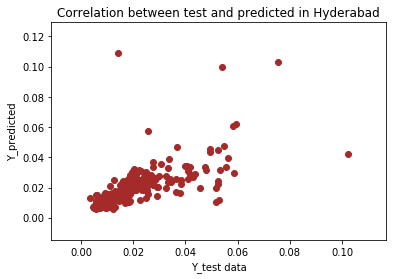

In [268]:
plt.scatter(y_test,y_pred,color='brown')
plt.title("Correlation between test and predicted in Hyderabad")
plt.xlabel("Y_test data")
plt.ylabel("Y_predicted")
plt.show()

In [286]:
Chen= city_day[city_day['City']=='Chennai']
Chen.head()
Chen_norm = pd.DataFrame(normalize(Chen.iloc[:,1:], axis=0), columns = Chen.columns[1:])
features3=Chen_norm
target3=Chen_norm['AQI']
#target=Ahm_norm[['AQI','PM2.5','O3']]
features3=features3.drop('PM2.5',axis=1)
features3=features3.drop('PM10',axis=1)
features3=features3.drop('NO',axis=1)
features3=features3.drop('NO2',axis=1)
features3=features3.drop('NOx',axis=1)
features3=features3.drop('NH3',axis=1)
features3=features3.drop('CO',axis=1)
#features2=features1.drop('AQI',axis=1)
features3=features3.drop('SO2',axis=1)
features3=features3.drop('O3',axis=1)
features3=features3.drop('Benzene',axis=1)
features3=features3.drop('Toluene',axis=1)
features3.tail()
#features.head()
Chen.reset_index(drop = True, inplace = True)
Chen_features = Chen
Chen_features = Chen_features.drop('City', axis = 1)
Chen_features = Chen_features.drop('AQI', axis = 1)
Chen_features.to_numpy()
import matplotlib.pyplot as plt

target3 = target3.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(Chen_features, target3)
regressor3 = LinearRegression(normalize=True)
regressor3.fit(X_train, y_train)
print("Predicted values:", regressor3.predict(X_test))
y_pred = regressor3.predict(X_test)
y_pred.shape
print("R^2 score for liner regression: ", regressor3.score(X_test, y_test))

Predicted values: [0.0302093  0.01560022 0.01918759 0.02311303 0.01155116 0.01308777
 0.0126023  0.00696888 0.01947809 0.01371738 0.0178521  0.01798578
 0.01960996 0.01396485 0.01531974 0.01318061 0.01492215 0.05831547
 0.01236981 0.01623229 0.02243322 0.01780567 0.02065107 0.01828352
 0.01113925 0.01371374 0.01682146 0.02335201 0.01555794 0.0142235
 0.01027535 0.02455149 0.01235237 0.01371064 0.0211292  0.013249
 0.01901036 0.02390958 0.01800947 0.02479515 0.01501062 0.02092694
 0.01168353 0.01586198 0.0163207  0.01140527 0.01197718 0.02988717
 0.02104045 0.01474941 0.01674522 0.01472922 0.01882479 0.02027152
 0.02513995 0.01074527 0.01107468 0.01566429 0.02404388 0.01348478
 0.0130665  0.02430277 0.02199888 0.01859035 0.01617653 0.01567445
 0.04084316 0.01298213 0.03695319 0.01234948 0.01885988 0.0133329
 0.02954447 0.01832879 0.0213382  0.01491033 0.01193698 0.02126723
 0.01692281 0.01819124 0.02354487 0.0480414  0.0134764  0.01531679
 0.01039218 0.02669138 0.01221419 0.01941868 0.0

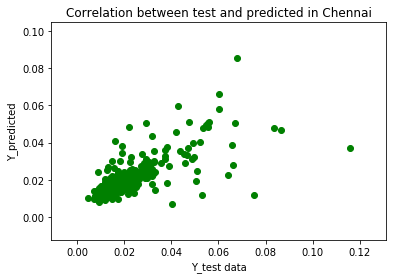

In [287]:
plt.scatter(y_test,y_pred,color='green')
plt.title("Correlation between test and predicted in Chennai")
plt.xlabel("Y_test data")
plt.ylabel("Y_predicted")
plt.show()

In [205]:
df.drop(df[df['Date'] > '2020-03-24'].index, inplace = True)

In [206]:
original=df.copy()

In [207]:
original.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [208]:
original.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29427,Visakhapatnam,2020-03-20,23.97,67.96,11.37,35.13,27.93,11.38,0.87,11.12,37.46,5.28,12.72,5.73,91.0,Satisfactory
29428,Visakhapatnam,2020-03-21,20.57,60.98,8.58,33.67,24.88,10.11,0.76,11.08,18.41,3.35,13.43,2.82,66.0,Satisfactory
29429,Visakhapatnam,2020-03-22,23.57,69.26,12.32,24.78,23.13,10.84,0.66,10.28,19.71,3.08,17.32,1.62,62.0,Satisfactory
29430,Visakhapatnam,2020-03-23,19.59,42.84,7.82,20.91,17.39,9.44,0.72,9.73,26.65,1.79,4.80,1.21,72.0,Satisfactory
29431,Visakhapatnam,2020-03-24,39.49,95.32,14.83,40.71,33.71,NaN,0.68,16.72,33.77,4.38,8.69,3.25,98.0,Satisfactory


In [209]:
original= original.drop('Xylene', axis=1)

In [210]:
original= original.drop('AQI_Bucket', axis=1)

In [211]:
original['Date'] = pd.to_datetime(original['Date'])
original.set_index('Date',inplace=True)

In [212]:
Ahm_1 = original[original['City']=='Ahmedabad']

In [224]:
Ahm_1.isnull().sum()

City          0
PM2.5       627
PM10       1599
NO          609
NO2         608
NOx         594
NH3        1910
CO          609
SO2         613
O3          685
Benzene     483
Toluene     483
AQI         673
dtype: int64

In [225]:
Ahm_1=Ahm_1.dropna()

In [244]:
Ahm_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     0 non-null      object 
 1   PM2.5    0 non-null      float64
 2   PM10     0 non-null      float64
 3   NO       0 non-null      float64
 4   NO2      0 non-null      float64
 5   NOx      0 non-null      float64
 6   NH3      0 non-null      float64
 7   CO       0 non-null      float64
 8   SO2      0 non-null      float64
 9   O3       0 non-null      float64
 10  Benzene  0 non-null      float64
 11  Toluene  0 non-null      float64
 12  AQI      0 non-null      float64
dtypes: float64(12), object(1)
memory usage: 0.0+ bytes


In [226]:
#Ahm_1 = Ahm_1.drop('Date', axis=1)

In [246]:
Ahm_1.shape

(0, 13)

In [247]:
Ahm_norm_1 = pd.DataFrame(normalize(Ahm_1.iloc[:,1:], axis=0), columns = Ahm_1.columns[1:])

ValueError: Found array with 0 sample(s) (shape=(0, 12)) while a minimum of 1 is required by the normalize function.

In [253]:
Ahm_features_1 = Ahm_1
Ahm_features_1 = Ahm_features_1.drop('City', axis = 1)
Ahm_features_1 = Ahm_features_1.drop('AQI', axis = 1)

In [254]:
#Ahm_features_1.to_numpy()

In [255]:
target_1=Ahm_1['AQI']

In [256]:
import matplotlib.pyplot as plt

target_1 = target_1.to_numpy()

In [257]:
X_train, X_test, y_train, y_test = train_test_split(Ahm_features_1, target_1)

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [258]:
regressor11= LinearRegression(normalize=True)
regressor11.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [259]:
print("Predicted values:", regressor_1.predict(X_test))
y_pred = regressor11.predict(X_test)
y_pred.shape
print("R^2 score for liner regression: ", regressor_1.score(X_test, y_test))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

ValueError: x and y must be the same size

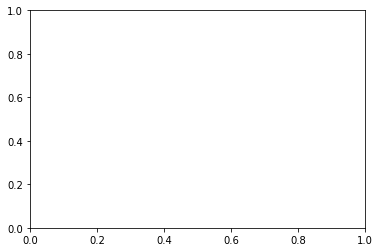

In [260]:
plt.scatter(y_test,y_pred,color='brown')
plt.title("Correlation between test and predicted in Hyderabad")
plt.xlabel("Y_test data")
plt.ylabel("Y_predicted")
plt.show()